# Phylogenetic Distance Calculation from RhizCG 2013

Notes: Calculate phylogenetic distance using phylogeny created from rbcL and matK in phylogenerator 20160209_phylogeny.tre.  

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
library(lme4)
library(lmerTest)
library(ggplot2)
library(dplyr)
library(tidyr)
library(pbkrtest)
library(gridExtra)
library(reshape2)
library(picante)
library(ape)
library(phyloseq)
library(doParallel)

/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: Matrix

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: ‘lmerTest’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following object is masked from ‘package:lme4’:

    lmer


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following object is masked from ‘package:stats’:

    step


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: ‘dplyr’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/p

In [5]:
%%R
citation(package = "lmerTest", lib.loc = NULL)


To cite package ‘lmerTest’ in publications use:

  Alexandra Kuznetsova, Per Bruun Brockhoff and Rune Haubo Bojesen
  Christensen (2016). lmerTest: Tests in Linear Mixed Effects Models. R
  package version 2.0-32. https://CRAN.R-project.org/package=lmerTest

A BibTeX entry for LaTeX users is

  @Manual{,
    title = {lmerTest: Tests in Linear Mixed Effects Models},
    author = {Alexandra Kuznetsova and Per {Bruun Brockhoff} and Rune {Haubo Bojesen Christensen}},
    year = {2016},
    note = {R package version 2.0-32},
    url = {https://CRAN.R-project.org/package=lmerTest},
  }



## Set file locations

In [4]:
%%R
workDir = '/home/bryan/RhizCG/PhyDist/'
treeFile = '/home/bryan/RhizCG/PhyDist/20160209_phylogeny.tre'
NAMFile = '/home/bryan/RhizCG/PhyDist/NAM_founders_distanceMatrix_v2.txt'

### Read  master table 

In [5]:
%%R 
setwd(workDir)
phy = read.tree(treeFile)

NAMdist = read.table(NAMFile, header = TRUE)

In [6]:
%%R
#reorder so that NAMdist is in same order as log2fold change matrix
NAMdist = NAMdist[c(1:6, 8, 7, 9, 10), c(1:6, 8, 7, 9, 10)]

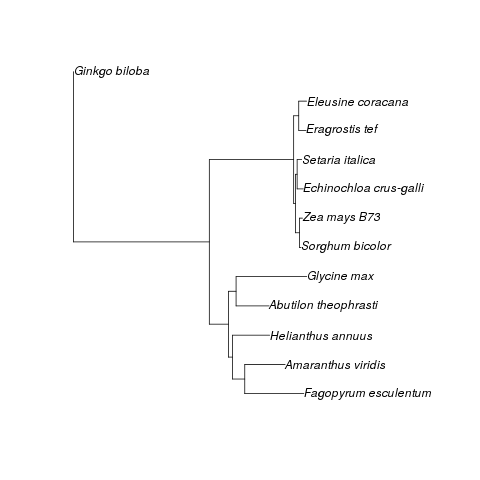

In [7]:
%%R
plot(phy)

In [131]:
%%R
phy
phydist = cophenetic.phylo(phy)
str(phydist)

 num [1:12, 1:12] 0 0.232 0.253 0.271 0.359 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:12] "Fagopyrum_esculentum" "Amaranthus_viridis" "Helianthus_annuus" "Abutilon_theophrasti" ...
  ..$ : chr [1:12] "Fagopyrum_esculentum" "Amaranthus_viridis" "Helianthus_annuus" "Abutilon_theophrasti" ...


In [9]:
%%R
colnames(phydist)
colnames(phydist) = c("FAGES", "AMAPO", "HELAN", "ABUTH", "GLYMA", "SORBI", "B73", "ECHCG",
                     "SETFA", "ERATE", "ELCOR", "Ginkgo")
rownames(phydist) = c("FAGES", "AMAPO", "HELAN", "ABUTH", "GLYMA", "SORBI", "B73", "ECHCG",
                     "SETFA", "ERATE", "ELCOR", "Ginkgo")
phydist

         FAGES   AMAPO   HELAN   ABUTH   GLYMA   SORBI     B73   ECHCG   SETFA
FAGES  0.00000 0.23210 0.25302 0.27096 0.35879 0.43476 0.43787 0.43985 0.43592
AMAPO  0.23210 0.00000 0.20952 0.22746 0.31529 0.39126 0.39437 0.39635 0.39242
HELAN  0.25302 0.20952 0.00000 0.19116 0.27899 0.35496 0.35807 0.36005 0.35612
ABUTH  0.27096 0.22746 0.19116 0.00000 0.24183 0.35370 0.35681 0.35879 0.35486
GLYMA  0.35879 0.31529 0.27899 0.24183 0.00000 0.44153 0.44464 0.44662 0.44269
SORBI  0.43476 0.39126 0.35496 0.35370 0.44153 0.00000 0.01153 0.03193 0.02800
B73    0.43787 0.39437 0.35807 0.35681 0.44464 0.01153 0.00000 0.03504 0.03111
ECHCG  0.43985 0.39635 0.36005 0.35879 0.44662 0.03193 0.03504 0.00000 0.02517
SETFA  0.43592 0.39242 0.35612 0.35486 0.44269 0.02800 0.03111 0.02517 0.00000
ERATE  0.44622 0.40272 0.36642 0.36516 0.45299 0.04656 0.04967 0.05165 0.04772
ELCOR  0.44745 0.40395 0.36765 0.36639 0.45422 0.04779 0.05090 0.05288 0.04895
Ginkgo 0.53719 0.49369 0.45739 0.45613 0.54396 0.530

In [126]:
%%R
out = phydist %>% as.matrix %>% as.data.frame()
write.csv(out, file = "phyDist.csv")

In [129]:
%%R
phy_expand = read.csv(file = "phyDist_expanded.csv", header = TRUE)
head(phy_expand)

      X   FAGES   AMAPO   HELAN   ABUTH   GLYMA   SORBI     B73   ECHCG   SETFA
1 FAGES 0.00000 0.23210 0.25302 0.27096 0.35879 0.43476 0.43787 0.43985 0.43592
2 AMAPO 0.23210 0.00000 0.20952 0.22746 0.31529 0.39126 0.39437 0.39635 0.39242
3 HELAN 0.25302 0.20952 0.00000 0.19116 0.27899 0.35496 0.35807 0.36005 0.35612
4 ABUTH 0.27096 0.22746 0.19116 0.00000 0.24183 0.35370 0.35681 0.35879 0.35486
5 GLYMA 0.35879 0.31529 0.27899 0.24183 0.00000 0.44153 0.44464 0.44662 0.44269
6 SORBI 0.43476 0.39126 0.35496 0.35370 0.44153 0.00000 0.01153 0.03193 0.02800
    ERATE   ELCOR X75.062    Oh7B     M71     B97     Ki3   Tx303   Hp301
1 0.44622 0.44745 0.43787 0.43787 0.43787 0.43787 0.43787 0.43787 0.43787
2 0.40272 0.40395 0.39437 0.39437 0.39437 0.39437 0.39437 0.39437 0.39437
3 0.36642 0.36765 0.35807 0.35807 0.35807 0.35807 0.35807 0.35807 0.35807
4 0.36516 0.36639 0.35681 0.35681 0.35681 0.35681 0.35681 0.35681 0.35681
5 0.45299 0.45422 0.44464 0.44464 0.44464 0.44464 0.44464 0.44464 0.44

### Use melt to create a dataframe with species by species comparisons that will later be compared with plot by plot unifrac distances

Notes: inefficient use of space, consider dropping records above the diagonal of the distance matrix

In [132]:
%%R
pd.m = melt(phydist)

#set column names and create comparison column
colnames(pd.m) = c("PlantA", "PlantB", "phy_Dist")
pd.m$PlantComp = paste(pd.m$PlantA, pd.m$PlantB, sep = "-")
pd.m %>% head

                PlantA               PlantB phy_Dist
1 Fagopyrum_esculentum Fagopyrum_esculentum  0.00000
2   Amaranthus_viridis Fagopyrum_esculentum  0.23210
3    Helianthus_annuus Fagopyrum_esculentum  0.25302
4 Abutilon_theophrasti Fagopyrum_esculentum  0.27096
5          Glycine_max Fagopyrum_esculentum  0.35879
6      Sorghum_bicolor Fagopyrum_esculentum  0.43476
                                  PlantComp
1 Fagopyrum_esculentum-Fagopyrum_esculentum
2   Amaranthus_viridis-Fagopyrum_esculentum
3    Helianthus_annuus-Fagopyrum_esculentum
4 Abutilon_theophrasti-Fagopyrum_esculentum
5          Glycine_max-Fagopyrum_esculentum
6      Sorghum_bicolor-Fagopyrum_esculentum


# Import phyloseq object and calculate unifrac distances

In [17]:
%%R
F = file.path('/home/bryan/RhizCG/data/MiSeq_amplicon/MergedRuns/physeq/Full-Sparsity3in3_r')
physeq.Full = readRDS(F)
sd = sample_data(physeq.Full)


physeq.Full = filter_taxa(physeq.Full, function(x) sum(x > 0) > 1, TRUE)
physeq.Full

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4982 taxa and 238 samples ]
sample_data() Sample Data:       [ 238 samples by 49 sample variables ]
tax_table()   Taxonomy Table:    [ 4982 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4982 tips and 4981 internal nodes ]


In [18]:
%%R
physeq.Full
physeq.Nneg = subset_samples(physeq.Full, Treatment == "Nneg")

In [121]:
%%R
colnames(sd)
sd$Plant %>% unique

 [1] BARE   75-062 Oh7B   SETFA  MS71   ERATE  FAGES  B73    AMAPO  B97   
[11] GLYMA  H99    Il14H  SORBI  SORSUD ELCOR  ABUTH  Ki3    HELAN  Tx303 
[21] Hp301  ECHCG  Mo18  
23 Levels: 75-062 ABUTH AMAPO B73 B97 BARE ECHCG ELCOR ERATE FAGES ... Tx303


## Calculate w-Unifrac distances

In [20]:
%%R
registerDoParallel(cores=28)
wunif.dist = distance(physeq.Nneg, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

In [101]:
%%R
as.matrix(wunif.dist) %>% head

                  sample4-4.27_Nneg sample4-1.06_Nneg sample2-1.06_Nneg
sample4-4.27_Nneg         0.0000000         0.1105126         0.1157535
sample4-1.06_Nneg         0.1105126         0.0000000         0.1053257
sample2-1.06_Nneg         0.1157535         0.1053257         0.0000000
sample6-3.07_Nneg         0.1021802         0.1060497         0.1098460
sample5-3.07_Nneg         0.1295857         0.1147466         0.1160275
sample5-1.22_Nneg         0.2375299         0.2314230         0.2162495
                  sample6-3.07_Nneg sample5-3.07_Nneg sample5-1.22_Nneg
sample4-4.27_Nneg        0.10218020        0.12958567         0.2375299
sample4-1.06_Nneg        0.10604973        0.11474657         0.2314230
sample2-1.06_Nneg        0.10984599        0.11602749         0.2162495
sample6-3.07_Nneg        0.00000000        0.09572136         0.2308121
sample5-3.07_Nneg        0.09572136        0.00000000         0.2287192
sample5-1.22_Nneg        0.23081206        0.22871922         0.

In [102]:
%%R
ud.m = melt(as.matrix(wunif.dist))
head(ud.m) %>% print
dim(ud.m) %>% print
colnames(ud.m) = c("PlotA", "PlotB", "w_Unif_Dist")

#Join with plant names
ud.m = left_join(ud.m, sd[, c(1,9)], by = c("PlotA" = "X.sample"))
head(ud.m) %>% print
colnames(ud.m)[4] = "PlantA"

ud.m = left_join(ud.m, sd[, c(1,9)], by = c("PlotB" = "X.sample"))
head(ud.m) %>% print
colnames(ud.m)[5] = "PlantB"
ud.m$PlantComp = paste(ud.m$PlantA, ud.m$PlantB, sep = "-")

               Var1              Var2     value
1 sample4-4.27_Nneg sample4-4.27_Nneg 0.0000000
2 sample4-1.06_Nneg sample4-4.27_Nneg 0.1105126
3 sample2-1.06_Nneg sample4-4.27_Nneg 0.1157535
4 sample6-3.07_Nneg sample4-4.27_Nneg 0.1021802
5 sample5-3.07_Nneg sample4-4.27_Nneg 0.1295857
6 sample5-1.22_Nneg sample4-4.27_Nneg 0.2375299
[1] 14161     3
              PlotA             PlotB w_Unif_Dist  Plant
1 sample4-4.27_Nneg sample4-4.27_Nneg   0.0000000   BARE
2 sample4-1.06_Nneg sample4-4.27_Nneg   0.1105126   BARE
3 sample2-1.06_Nneg sample4-4.27_Nneg   0.1157535   BARE
4 sample6-3.07_Nneg sample4-4.27_Nneg   0.1021802   BARE
5 sample5-3.07_Nneg sample4-4.27_Nneg   0.1295857   BARE
6 sample5-1.22_Nneg sample4-4.27_Nneg   0.2375299 75-062
              PlotA             PlotB w_Unif_Dist PlantA Plant
1 sample4-4.27_Nneg sample4-4.27_Nneg   0.0000000   BARE  BARE
2 sample4-1.06_Nneg sample4-4.27_Nneg   0.1105126   BARE  BARE
3 sample2-1.06_Nneg sample4-4.27_Nneg   0.1157535   BARE  BA

* How to remove duplicates, ie values above the diagonal?  Possibly a loop that checks if var1-var2 = var2-var1, then remove.

# Join with plant phylogenetic distance

In [103]:
%%R
Dist = left_join(ud.m, pd.m[,c(3,4)], by = "PlantComp")
head(Dist)

              PlotA             PlotB w_Unif_Dist PlantA PlantB   PlantComp
1 sample4-4.27_Nneg sample4-4.27_Nneg   0.0000000   BARE   BARE   BARE-BARE
2 sample4-1.06_Nneg sample4-4.27_Nneg   0.1105126   BARE   BARE   BARE-BARE
3 sample2-1.06_Nneg sample4-4.27_Nneg   0.1157535   BARE   BARE   BARE-BARE
4 sample6-3.07_Nneg sample4-4.27_Nneg   0.1021802   BARE   BARE   BARE-BARE
5 sample5-3.07_Nneg sample4-4.27_Nneg   0.1295857   BARE   BARE   BARE-BARE
6 sample5-1.22_Nneg sample4-4.27_Nneg   0.2375299 75-062   BARE 75-062-BARE
  phy_Dist
1       NA
2       NA
3       NA
4       NA
5       NA
6       NA


#### Populate maize--annuals comparisons
 * Retreive B73--annualls comparisons
 * Identifier for maize plots

In [118]:
%%R
head(Dist)

              PlotA             PlotB w_Unif_Dist PlantA PlantB   PlantComp
1 sample4-4.27_Nneg sample4-4.27_Nneg   0.0000000   BARE   BARE   BARE-BARE
2 sample4-1.06_Nneg sample4-4.27_Nneg   0.1105126   BARE   BARE   BARE-BARE
3 sample2-1.06_Nneg sample4-4.27_Nneg   0.1157535   BARE   BARE   BARE-BARE
4 sample6-3.07_Nneg sample4-4.27_Nneg   0.1021802   BARE   BARE   BARE-BARE
5 sample5-3.07_Nneg sample4-4.27_Nneg   0.1295857   BARE   BARE   BARE-BARE
6 sample5-1.22_Nneg sample4-4.27_Nneg   0.2375299 75-062   BARE 75-062-BARE
  phy_Dist
1       NA
2       NA
3       NA
4       NA
5       NA
6       NA


In [120]:
%%R
MaizeAnnual = filter(Dist, PlantA == "B73" | PlantB == "B73" | PlantA == "SORBI" | PlantB == "SORBI") 
Mlookup  = MaizeAnnual %>%
     group_by(PlantComp) %>% 
        summarize(phy_dist = first(phy_Dist))
Mlookup %>% head()
#B73 sorghum  = .01 phy_Dist


Source: local data frame [6 x 2]

     PlantComp phy_dist
         (chr)    (dbl)
1   75-062-B73       NA
2 75-062-SORBI       NA
3    ABUTH-B73  0.35681
4  ABUTH-SORBI  0.35370
5    AMAPO-B73  0.39437
6  AMAPO-SORBI  0.39126


In [ ]:
%%R

[1] 14161     7
[1] 14042     7


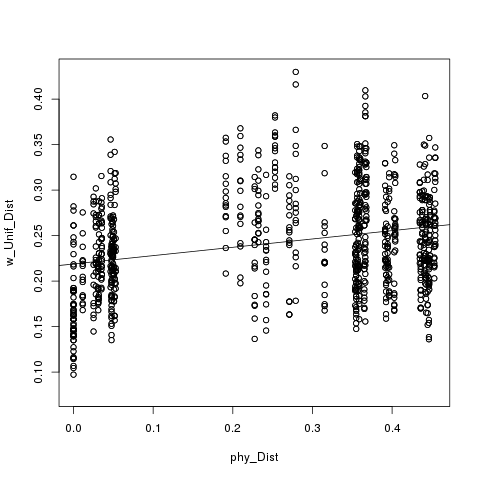

In [58]:
%%R
dim(Dist) %>% print
D.s = filter(Dist, PlotA != PlotB)

dim(D.s) %>% print
plot(w_Unif_Dist~phy_Dist, data = D.s)
m = lm(w_Unif_Dist~phy_Dist, data = D.s)
abline(m)

# Mantel test of phylogenetic distance and microbial community distance

## Set up distance matrices

In [59]:
%%R
head(Dist)

              PlotA             PlotB w_Unif_Dist PlantA PlantB   PlantComp
1 sample4-4.27_Nneg sample4-4.27_Nneg   0.0000000   BARE   BARE   BARE-BARE
2 sample4-1.06_Nneg sample4-4.27_Nneg   0.1105126   BARE   BARE   BARE-BARE
3 sample2-1.06_Nneg sample4-4.27_Nneg   0.1157535   BARE   BARE   BARE-BARE
4 sample6-3.07_Nneg sample4-4.27_Nneg   0.1021802   BARE   BARE   BARE-BARE
5 sample5-3.07_Nneg sample4-4.27_Nneg   0.1295857   BARE   BARE   BARE-BARE
6 sample5-1.22_Nneg sample4-4.27_Nneg   0.2375299 75-062   BARE 75-062-BARE
  phy_Dist
1       NA
2       NA
3       NA
4       NA
5       NA
6       NA


In [62]:
%%R
head(Dist)
#Remove NAs to trim dataset
Temp = Dist[!is.na(Dist$phy_Dist),]

#Seperate unifrac and phylogenetic distances retaining plot IDs
U = Temp[,c(1,2,3)]
Phy = Temp[,c(1,2,7)]

#Re-cast longform to wide form.  
Udist = acast(U, PlotA~PlotB)


Phydist = acast(Phy, PlotA~PlotB)




## Mantel test

In [63]:
%%R
M1 = mantel(as.dist(Phydist), as.dist(Udist), method="pearson", permutations=999)
print(M1)


Mantel statistic based on Pearson's product-moment correlation 

Call:
mantel(xdis = as.dist(Phydist), ydis = as.dist(Udist), method = "pearson",      permutations = 999) 

Mantel statistic r: 0.2723 
      Significance: 0.001 

Upper quantiles of permutations (null model):
   90%    95%  97.5%    99% 
0.0789 0.1068 0.1264 0.1543 
Permutation: free
Number of permutations: 999



In [64]:
%%R
p1 = protest(Phydist, Udist, scores = "sites", permutations = 999)
summary(p1)


Call:
protest(X = Phydist, Y = Udist, scores = "sites", permutations = 999) 

Number of objects: 43    Number of dimensions: 43 

Procrustes sum of squares:  
 0.8325034 
Procrustes root mean squared error: 
 0.1391422 
Quantiles of Procrustes errors:
       Min         1Q     Median         3Q        Max 
0.08693794 0.11511516 0.12952843 0.15698971 0.19988321 

Rotation matrix:
              [,1]         [,2]          [,3]         [,4]          [,5]
 [1,]  0.220416938  0.311618705  0.7533933672  0.068166136  0.1070870035
 [2,]  0.773929142  0.070641470 -0.2140009014 -0.003938861  0.0307607557
 [3,] -0.185705310  0.034596994  0.2579126021  0.153389592 -0.1434984918
 [4,] -0.116424833  0.242230569  0.0890294911  0.235029187 -0.1708217007
 [5,]  0.002884199  0.014185593 -0.0056671908 -0.037496671 -0.1315155476
 [6,]  0.070844763  0.002193429 -0.0519808361 -0.304057949 -0.1573900701
 [7,] -0.089977500 -0.041365971 -0.0071954098 -0.075651065  0.4278610933
 [8,] -0.088733064 -0.031462556 -

# Maize distance analysis

In [65]:
%%R
##import distance matrix from Alberto above
NAMdist


            B73       B97       H99     Hp301     Il14H       Ki3      Mo18
B73   0.0000000 0.1285456 0.1306701 0.1357241 0.1412994 0.1413460 0.1409265
B97   0.1285456 0.0000000 0.1323307 0.1407961 0.1441898 0.1431876 0.1448244
H99   0.1306701 0.1323307 0.0000000 0.1396393 0.1435944 0.1430394 0.1433084
Hp301 0.1357241 0.1407961 0.1396393 0.0000000 0.1391905 0.1483772 0.1471428
Il14H 0.1412994 0.1441898 0.1435944 0.1391905 0.0000000 0.1587129 0.1567080
Ki3   0.1413460 0.1431876 0.1430394 0.1483772 0.1587129 0.0000000 0.1370860
Mo18  0.1409265 0.1448244 0.1433084 0.1471428 0.1567080 0.1370860 0.0000000
MS71  0.1259195 0.1237505 0.1328223 0.1395875 0.1439733 0.1435773 0.1439563
Oh7B  0.1264251 0.1275299 0.1329044 0.1408226 0.1452553 0.1427124 0.1421373
Tx303 0.1351212 0.1384145 0.1392861 0.1423267 0.1511486 0.1375954 0.1355506
           MS71      Oh7B     Tx303
B73   0.1259195 0.1264251 0.1351212
B97   0.1237505 0.1275299 0.1384145
H99   0.1328223 0.1329044 0.1392861
Hp301 0.1395875 0.14

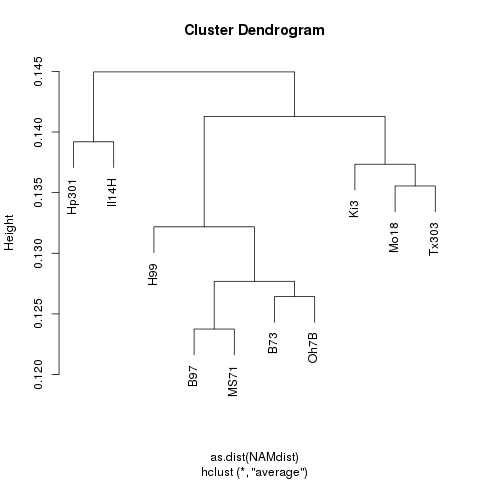

In [66]:
%%R
NAM_hc = hclust(as.dist(NAMdist), "average")
plot(NAM_hc)

In [67]:
%%R
#Use melt to join genetic distance matrix with unifrac distance
#head(ud.m) ##Use formated unifrac distance from above
#melt 
NAM.m = melt(as.matrix(NAMdist))

#set column names and create comparison column
colnames(NAM.m) = c("PlantA", "PlantB", "gene_Dist")

NAM.m$PlantComp = paste(NAM.m$PlantA, NAM.m$PlantB, sep = "-")
NAM.m %>% head

#Join with unifrac DistanceMatrix
Dist = left_join(ud.m, NAM.m[,c(3,4)], by = "PlantComp")
head(Dist)

              PlotA             PlotB w_Unif_Dist PlantA PlantB   PlantComp
1 sample4-4.27_Nneg sample4-4.27_Nneg   0.0000000   BARE   BARE   BARE-BARE
2 sample4-1.06_Nneg sample4-4.27_Nneg   0.1105126   BARE   BARE   BARE-BARE
3 sample2-1.06_Nneg sample4-4.27_Nneg   0.1157535   BARE   BARE   BARE-BARE
4 sample6-3.07_Nneg sample4-4.27_Nneg   0.1021802   BARE   BARE   BARE-BARE
5 sample5-3.07_Nneg sample4-4.27_Nneg   0.1295857   BARE   BARE   BARE-BARE
6 sample5-1.22_Nneg sample4-4.27_Nneg   0.2375299 75-062   BARE 75-062-BARE
  gene_Dist
1        NA
2        NA
3        NA
4        NA
5        NA
6        NA


[1] 14161     7
[1] 14042     7


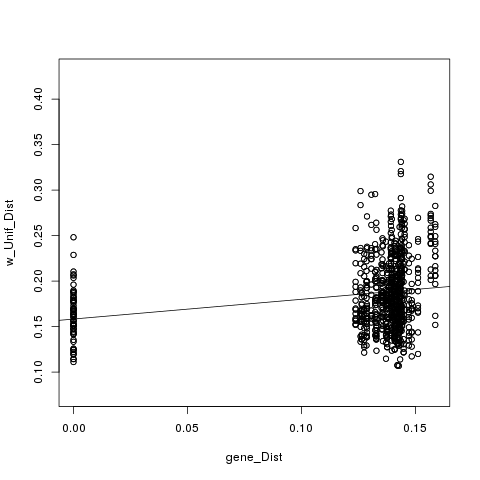

In [68]:
%%R
dim(Dist) %>% print
D.s = filter(Dist, PlotA != PlotB)

dim(D.s) %>% print
plot(w_Unif_Dist~gene_Dist, data = D.s)
m = lm(w_Unif_Dist~gene_Dist, data = D.s)
abline(m)

In [69]:
%%R
head(Dist)

              PlotA             PlotB w_Unif_Dist PlantA PlantB   PlantComp
1 sample4-4.27_Nneg sample4-4.27_Nneg   0.0000000   BARE   BARE   BARE-BARE
2 sample4-1.06_Nneg sample4-4.27_Nneg   0.1105126   BARE   BARE   BARE-BARE
3 sample2-1.06_Nneg sample4-4.27_Nneg   0.1157535   BARE   BARE   BARE-BARE
4 sample6-3.07_Nneg sample4-4.27_Nneg   0.1021802   BARE   BARE   BARE-BARE
5 sample5-3.07_Nneg sample4-4.27_Nneg   0.1295857   BARE   BARE   BARE-BARE
6 sample5-1.22_Nneg sample4-4.27_Nneg   0.2375299 75-062   BARE 75-062-BARE
  gene_Dist
1        NA
2        NA
3        NA
4        NA
5        NA
6        NA


In [70]:
%%R
head(Dist)
#Remove NAs to trim dataset
Temp = Dist[!is.na(Dist$gene_Dist),]

#Seperate unifrac and phylogenetic distances retaining plot IDs
U = Temp[,c(1,2,3)]
Gene = Temp[,c(1,2,7)]

#Re-cast longform to wide form.  
Udist = acast(U, PlotA~PlotB) 


Genedist = acast(Gene, PlotA~PlotB)
Genedist

                  sample5-1.16_Nneg sample5-1.17_Nneg sample5-1.25_Nneg
sample5-1.16_Nneg         0.0000000         0.1328223         0.1435944
sample5-1.17_Nneg         0.1328223         0.0000000         0.1439733
sample5-1.25_Nneg         0.1435944         0.1439733         0.0000000
sample5-2.06_Nneg         0.1328223         0.0000000         0.1439733
sample5-2.11_Nneg         0.0000000         0.1328223         0.1435944
sample5-2.15_Nneg         0.1435944         0.1439733         0.0000000
sample5-3.13_Nneg         0.1328223         0.0000000         0.1439733
sample5-3.16_Nneg         0.0000000         0.1328223         0.1435944
sample5-3.17_Nneg         0.1435944         0.1439733         0.0000000
sample5-4.05_Nneg         0.0000000         0.1328223         0.1435944
sample5-4.08_Nneg         0.1328223         0.0000000         0.1439733
sample5-4.09_Nneg         0.1435944         0.1439733         0.0000000
sample6-1.07_Nneg         0.1329044         0.1287556         0.

In [71]:
%%R
M1 = mantel(as.dist(Genedist), as.dist(Udist), method="pearson", permutations=999)
print(M1)


Mantel statistic based on Pearson's product-moment correlation 

Call:
mantel(xdis = as.dist(Genedist), ydis = as.dist(Udist), method = "pearson",      permutations = 999) 

Mantel statistic r: 0.2077 
      Significance: 0.001 

Upper quantiles of permutations (null model):
   90%    95%  97.5%    99% 
0.0391 0.0503 0.0594 0.0692 
Permutation: free
Number of permutations: 999



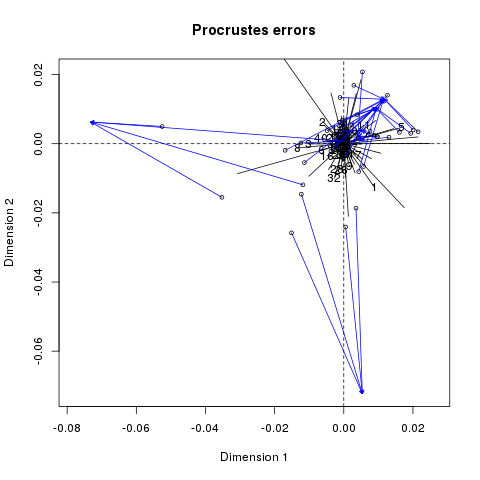

In [72]:
%%R
p1 = protest(Genedist, Udist, scores = "sites", permutations = 999)
plot(p1)

In [73]:
%%R
NAMdist %>% print
as.dist(NAMdist) %>% print

            B73       B97       H99     Hp301     Il14H       Ki3      Mo18
B73   0.0000000 0.1285456 0.1306701 0.1357241 0.1412994 0.1413460 0.1409265
B97   0.1285456 0.0000000 0.1323307 0.1407961 0.1441898 0.1431876 0.1448244
H99   0.1306701 0.1323307 0.0000000 0.1396393 0.1435944 0.1430394 0.1433084
Hp301 0.1357241 0.1407961 0.1396393 0.0000000 0.1391905 0.1483772 0.1471428
Il14H 0.1412994 0.1441898 0.1435944 0.1391905 0.0000000 0.1587129 0.1567080
Ki3   0.1413460 0.1431876 0.1430394 0.1483772 0.1587129 0.0000000 0.1370860
Mo18  0.1409265 0.1448244 0.1433084 0.1471428 0.1567080 0.1370860 0.0000000
MS71  0.1259195 0.1237505 0.1328223 0.1395875 0.1439733 0.1435773 0.1439563
Oh7B  0.1264251 0.1275299 0.1329044 0.1408226 0.1452553 0.1427124 0.1421373
Tx303 0.1351212 0.1384145 0.1392861 0.1423267 0.1511486 0.1375954 0.1355506
           MS71      Oh7B     Tx303
B73   0.1259195 0.1264251 0.1351212
B97   0.1237505 0.1275299 0.1384145
H99   0.1328223 0.1329044 0.1392861
Hp301 0.1395875 0.14

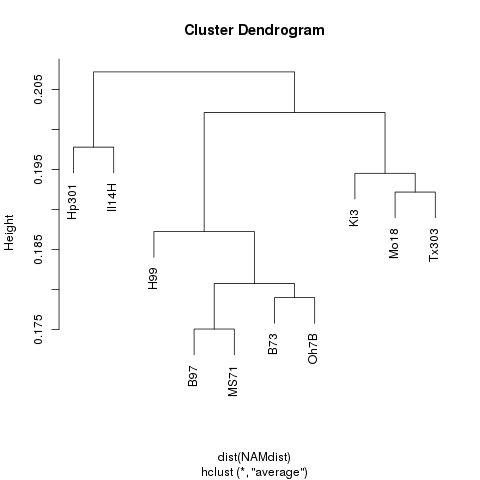

In [74]:
%%R
hc <- hclust(dist(NAMdist), "average")
plot(hc)

# Compare plant phylogenetic distance to l2f

In [75]:
%%R
log2foldFile = '/home/bryan/RhizCG/data/MiSeq_amplicon/MergedRuns/DeSeq2/bare-plant.csv'
l2f = read.csv(log2foldFile, header = TRUE)
colnames(l2f)

 [1] "log2FoldChange" "p"              "Rank1"          "Rank2"         
 [5] "Rank3"          "Rank4"          "Rank5"          "Rank6"         
 [9] "Rank7"          "Rank8"          "OTU"            "Day"           
[13] "Plant"          "p.adj"         


### Spread by plant to make matrix of log2fold change in each OTU by plant combo

In [76]:
%%R
df = l2f[,c(1,11,13)]
l2f_m = spread(df, Plant, log2FoldChange, fill = 0, drop = TRUE)
rownames(l2f_m) = l2f_m$OTU
l2f_m = l2f_m[,-1]
l2f_m %>% head

              75-062      ABUTH      AMAPO        B73        B97       ECHCG
OTU.10     3.7555530  3.5545741  3.9132382  4.7300540  3.9839591  4.11664286
OTU.100    0.2606542  0.1170689 -0.6546281 -0.3808746 -0.2665816 -0.06524162
OTU.1000   1.4421802  0.3860825  0.4441106  0.2538698  0.6160178  0.20458846
OTU.10004 -0.4822074 -0.2494195 -0.2619031  0.3825679  1.1076031 -0.07437641
OTU.10009  2.8654473  2.0340869  4.8486210  5.2198248  2.6268148  2.54961072
OTU.1001   1.3922765  2.9833065  0.0000000  6.0531310  6.4938158  0.00000000
                ELCOR      ERATE      FAGES       GLYMA        H99      HELAN
OTU.10     3.24226200  3.9988157  2.2260311  4.49312473  2.4095638  2.8795348
OTU.100   -0.02339426  0.2395577  1.0425259 -1.42291524 -0.8572354 -2.2457854
OTU.1000   1.44222101  1.4767113  1.9390252  0.15274501  0.4477225 -0.8588658
OTU.10004  0.38505326 -0.3608817 -0.7765150 -0.04926276  0.8493272  1.0058886
OTU.10009  6.75187752  5.9279894  0.1732563  4.52468015  2.3365635  2.7

In [77]:
%%R
dim(l2f_m)

[1] 4982   22


### recode all negative log2fold changes with 0

In [78]:
%%R
l2f_me = l2f_m
l2f_me[l2f_me < 0] = 0 
head(l2f_me)

             75-062     ABUTH     AMAPO       B73       B97     ECHCG     ELCOR
OTU.10    3.7555530 3.5545741 3.9132382 4.7300540 3.9839591 4.1166429 3.2422620
OTU.100   0.2606542 0.1170689 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
OTU.1000  1.4421802 0.3860825 0.4441106 0.2538698 0.6160178 0.2045885 1.4422210
OTU.10004 0.0000000 0.0000000 0.0000000 0.3825679 1.1076031 0.0000000 0.3850533
OTU.10009 2.8654473 2.0340869 4.8486210 5.2198248 2.6268148 2.5496107 6.7518775
OTU.1001  1.3922765 2.9833065 0.0000000 6.0531310 6.4938158 0.0000000 3.0372628
              ERATE     FAGES    GLYMA       H99    HELAN     Hp301     Il14H
OTU.10    3.9988157 2.2260311 4.493125 2.4095638 2.879535 4.4087742 4.3499124
OTU.100   0.2395577 1.0425259 0.000000 0.0000000 0.000000 0.0000000 0.2932776
OTU.1000  1.4767113 1.9390252 0.152745 0.4477225 0.000000 0.7013179 0.8479333
OTU.10004 0.0000000 0.0000000 0.000000 0.8493272 1.005889 0.0000000 0.0000000
OTU.10009 5.9279894 0.1732563 4.524680 2.3365635 2

## Calculate pairwise weighted Unifrac distances between samples

need to figure out how to run unifrac measure outside of phyloseq

In [79]:
%%R
physeq.Full

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4982 taxa and 238 samples ]
sample_data() Sample Data:       [ 238 samples by 49 sample variables ]
tax_table()   Taxonomy Table:    [ 4982 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4982 tips and 4981 internal nodes ]


In [80]:
%%R
#provide fast tree for unifrac calculation
#treeFile = '/home/bryan/RhizCG/data/MiSeq_amplicon/MergedRuns/fasttree/otusn.tree'
#Tree = read.tree(treeFile)
Tree = phy_tree(physeq.Full)
str(Tree)


List of 5
 $ edge       : int [1:9962, 1:2] 4983 4983 4984 4985 4986 4987 4987 4986 4985 4984 ...
 $ Nnode      : int 4981
 $ tip.label  : chr [1:4982] "OTU.5899" "OTU.8680" "OTU.2666" "OTU.323" ...
 $ edge.length: num [1:9962] 0.0343 0.0501 0.0799 0.0182 0.0214 ...
 $ node.label : chr [1:4981] "" "0.606.5" "0.815" "0.894" ...
 - attr(*, "class")= chr "phylo"
 - attr(*, "order")= chr "cladewise"


In [90]:
%%R
l2f_wunif = picante::unifrac(as.matrix(t(l2f_me)), Tree)

In [91]:
%%R
l2f_bray = vegdist(as.matrix(t(l2f_me)), method = "bray")

NULL


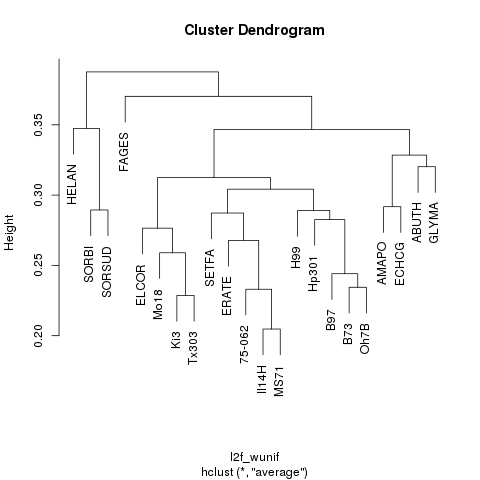

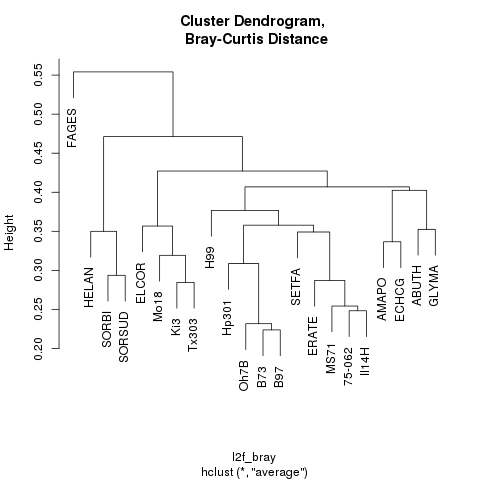

In [92]:
%%R
hc_unif = hclust(l2f_wunif, "average")
plot(hc_unif) %>% print

hc_bray = hclust(l2f_bray, "average")
plot(hc_bray, main = "Cluster Dendrogram, \n Bray-Curtis Distance")

# Mantel test of phylogenetic distance and l2f unifrac distance

### Maize

In [93]:
%%R
NAMdist %>% print

#subset column and rows of log2fold change so that only NAM lines are included
NLU = as.matrix(l2f_wunif)
NLU = NLU[c(4,5,11,13:18,22),c(4,5,11,13:18,22)]
NLU

NLB = as.matrix(l2f_bray)
NLB = NLB[c(4,5,11,13:18,22),c(4,5,11,13:18,22)]
NLB

            B73       B97       H99     Hp301     Il14H       Ki3      Mo18
B73   0.0000000 0.1285456 0.1306701 0.1357241 0.1412994 0.1413460 0.1409265
B97   0.1285456 0.0000000 0.1323307 0.1407961 0.1441898 0.1431876 0.1448244
H99   0.1306701 0.1323307 0.0000000 0.1396393 0.1435944 0.1430394 0.1433084
Hp301 0.1357241 0.1407961 0.1396393 0.0000000 0.1391905 0.1483772 0.1471428
Il14H 0.1412994 0.1441898 0.1435944 0.1391905 0.0000000 0.1587129 0.1567080
Ki3   0.1413460 0.1431876 0.1430394 0.1483772 0.1587129 0.0000000 0.1370860
Mo18  0.1409265 0.1448244 0.1433084 0.1471428 0.1567080 0.1370860 0.0000000
MS71  0.1259195 0.1237505 0.1328223 0.1395875 0.1439733 0.1435773 0.1439563
Oh7B  0.1264251 0.1275299 0.1329044 0.1408226 0.1452553 0.1427124 0.1421373
Tx303 0.1351212 0.1384145 0.1392861 0.1423267 0.1511486 0.1375954 0.1355506
           MS71      Oh7B     Tx303
B73   0.1259195 0.1264251 0.1351212
B97   0.1237505 0.1275299 0.1384145
H99   0.1328223 0.1329044 0.1392861
Hp301 0.1395875 0.14

In [94]:
%%R
M1 = mantel(as.dist(NAMdist), as.dist(NLU), method="pearson", permutations=999)
print(M1)


Mantel statistic based on Pearson's product-moment correlation 

Call:
mantel(xdis = as.dist(NAMdist), ydis = as.dist(NLU), method = "pearson",      permutations = 999) 

Mantel statistic r: 0.3985 
      Significance: 0.013 

Upper quantiles of permutations (null model):
  90%   95% 97.5%   99% 
0.275 0.328 0.376 0.412 
Permutation: free
Number of permutations: 999



In [95]:
%%R
M1 = mantel(as.dist(NAMdist), as.dist(NLB), method="pearson", permutations=999)
print(M1)


Mantel statistic based on Pearson's product-moment correlation 

Call:
mantel(xdis = as.dist(NAMdist), ydis = as.dist(NLB), method = "pearson",      permutations = 999) 

Mantel statistic r: 0.452 
      Significance: 0.012 

Upper quantiles of permutations (null model):
  90%   95% 97.5%   99% 
0.237 0.311 0.396 0.459 
Permutation: free
Number of permutations: 999



### Species

In [96]:
%%R

#Organize log2fold change distance matrix so that only plants with cholorplast distances are included 
#and column and row order is congruent with phylogenetic distance matrix
l2f_wunif.t = as.matrix(l2f_wunif) %>% as.data.frame()
    temp1 = l2f_wunif.t[c("FAGES", "AMAPO", "HELAN", "ABUTH", "GLYMA", "SORBI", "B73", "ECHCG",
                    "SETFA", "ERATE", "ELCOR"), c("FAGES", "AMAPO", "HELAN", "ABUTH", "GLYMA", "SORBI", "B73", "ECHCG",
                    "SETFA", "ERATE", "ELCOR")]

    SLU = as.matrix(temp1)

    SLU = as.dist(SLU)
    SLU %>% print

#Remove ginkgo so that matrices are congruent
p.temp = as.matrix(phydist) %>% as.data.frame()
    temp2 = p.temp[-12, -12] #remove ginkgo

    temp2 = as.matrix(temp2)
    phydist = as.dist(temp2)

    phydist %>% print

l2f_bray.t = as.matrix(l2f_bray) %>% as.data.frame()
    temp2 = l2f_bray.t[c("FAGES", "AMAPO", "HELAN", "ABUTH", "GLYMA", "SORBI", "B73", "ECHCG",
                    "SETFA", "ERATE", "ELCOR"), c("FAGES", "AMAPO", "HELAN", "ABUTH", "GLYMA", "SORBI", "B73", "ECHCG",
                    "SETFA", "ERATE", "ELCOR")]

    SLB = as.matrix(temp2)
    SLB = as.dist(SLB)
    SLB %>% print


          FAGES     AMAPO     HELAN     ABUTH     GLYMA     SORBI       B73
AMAPO 0.3342723                                                            
HELAN 0.5035754 0.3979322                                                  
ABUTH 0.3682866 0.3240776 0.4118752                                        
GLYMA 0.4088706 0.3228219 0.3945216 0.3201854                              
SORBI 0.4330183 0.3612378 0.3421771 0.3602916 0.3443746                    
B73   0.3775745 0.3538383 0.4124475 0.3490226 0.3339031 0.3408974          
ECHCG 0.3704284 0.2917447 0.4098412 0.3270240 0.3399034 0.3644222 0.3356861
SETFA 0.2952022 0.2907014 0.4257812 0.3174688 0.3413960 0.3450002 0.3020056
ERATE 0.3485277 0.3620173 0.4790500 0.3654579 0.3706006 0.3969722 0.3314409
ELCOR 0.4034968 0.3961371 0.4734902 0.3906721 0.3857268 0.4026007 0.3275491
          ECHCG     SETFA     ERATE
AMAPO                              
HELAN                              
ABUTH                              
GLYMA               

In [97]:
%%R
m1 = mantel(phydist, SLU, method="pearson", permutations=999)
print(m1)


Mantel statistic based on Pearson's product-moment correlation 

Call:
mantel(xdis = phydist, ydis = SLU, method = "pearson", permutations = 999) 

Mantel statistic r: 0.1718 
      Significance: 0.167 

Upper quantiles of permutations (null model):
  90%   95% 97.5%   99% 
0.224 0.292 0.352 0.397 
Permutation: free
Number of permutations: 999



In [89]:
%%R
m1 = mantel(phydist, SLB, method="pearson", permutations=999)
print(m1)


Error in as.dist(ydis) : object 'SLB' not found
